In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D

In [2]:
gdp_df=pd.read_csv("../Notebooks/UNdata1.csv", nrows=6729)
energy_df=pd.read_csv("../Notebooks/UNdata3.csv", nrows=59493)

In [3]:
energy_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59493 entries, 0 to 59492
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country or Area          59493 non-null  object 
 1   Commodity - Transaction  59493 non-null  object 
 2   Year                     59492 non-null  float64
 3   Unit                     59492 non-null  object 
 4   Quantity                 59492 non-null  float64
 5   Quantity Footnotes       15204 non-null  float64
dtypes: float64(3), object(3)
memory usage: 2.7+ MB


In [4]:
#Cleaning up energy_df

#Drop uneaded columns
energy_df = energy_df.drop(labels = {'Quantity Footnotes', 'Unit', 'Commodity - Transaction'}, axis = 1)

#Add column of full Kw value
energy_df['Kw'] = energy_df['Quantity']*1000

#Rename Columns
energy_df = energy_df.rename(columns = {'Country or Area' : 'Country', 'Quantity' : 'Kw in Thousands'})

#Convert 'Country' to a string
energy_df = energy_df.astype({'Country':'string'})

energy_df.info()
print(energy_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59493 entries, 0 to 59492
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          59493 non-null  string 
 1   Year             59492 non-null  float64
 2   Kw in Thousands  59492 non-null  float64
 3   Kw               59492 non-null  float64
dtypes: float64(3), string(1)
memory usage: 1.8 MB
       Country    Year  Kw in Thousands        Kw
0  Afghanistan  2017.0            519.0  519000.0
1  Afghanistan  2016.0            519.0  519000.0
2  Afghanistan  2015.0            519.0  519000.0
3  Afghanistan  2014.0            431.0  431000.0
4  Afghanistan  2013.0            431.0  431000.0


In [5]:
#Cleaning up gdp_df

#Drop uneaded columns
gdp_df = gdp_df.drop(labels='Value Footnotes', axis=1)

#Rename Columns
gdp_df = gdp_df.rename(columns = {'Country or Area': 'Country', 'Value':'GDP_Per_Capita'})

#Convert 'Country' to a string
gdp_df = gdp_df.astype({'Country':'string'})
                                  
gdp_df.info()
print(gdp_df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6729 entries, 0 to 6728
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         6729 non-null   string 
 1   Year            6729 non-null   int64  
 2   GDP_Per_Capita  6729 non-null   float64
dtypes: float64(1), int64(1), string(1)
memory usage: 157.8 KB
       Country  Year  GDP_Per_Capita
0  Afghanistan  2018     1734.723214
1  Afghanistan  2017     1758.465636
2  Afghanistan  2016     1757.023490
3  Afghanistan  2015     1766.593077
4  Afghanistan  2014     1795.735834


In [6]:
#Creates true total Kw ignoring the various type of electricity in the original dataset

energy_df = energy_df.groupby(['Country', 'Year'], as_index=False)['Kw in Thousands', 'Kw'].sum()

energy_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6305 entries, 0 to 6304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          6305 non-null   object 
 1   Year             6305 non-null   float64
 2   Kw in Thousands  6305 non-null   float64
 3   Kw               6305 non-null   float64
dtypes: float64(3), object(1)
memory usage: 246.3+ KB


<ipython-input-6-6213f5a8ae47>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  energy_df = energy_df.groupby(['Country', 'Year'], as_index=False)['Kw in Thousands', 'Kw'].sum()


In [7]:
energy_gdp = energy_df.merge(gdp_df, on = ['Country', 'Year'])

energy_gdp.info()
print(energy_gdp)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4468 entries, 0 to 4467
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          4468 non-null   object 
 1   Year             4468 non-null   float64
 2   Kw in Thousands  4468 non-null   float64
 3   Kw               4468 non-null   float64
 4   GDP_Per_Capita   4468 non-null   float64
dtypes: float64(4), object(1)
memory usage: 209.4+ KB
          Country    Year  Kw in Thousands         Kw  GDP_Per_Capita
0     Afghanistan  2002.0           1964.0  1964000.0     1016.245409
1     Afghanistan  2003.0           1956.0  1956000.0     1055.557459
2     Afghanistan  2004.0           1956.0  1956000.0     1025.208245
3     Afghanistan  2005.0           1956.0  1956000.0     1099.104568
4     Afghanistan  2006.0           1956.0  1956000.0     1123.871323
...           ...     ...              ...        ...             ...
4463     Zimbabwe  2014.0   

In [8]:
energy_gdp.nunique()

Country             170
Year                 29
Kw in Thousands    3116
Kw                 3112
GDP_Per_Capita     4468
dtype: int64

In [9]:
#What is the correlation? Woah, that's pretty low! I wonder what countries have high and low 
#individual values? 

energy_gdp['Kw'].corr(energy_gdp['GDP_Per_Capita'])

0.14857634569026237

In [10]:
energy_gdp.groupby('Country')['Kw', 'GDP_Per_Capita'].corr()

<ipython-input-10-fa193f903ae3>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  energy_gdp.groupby('Country')['Kw', 'GDP_Per_Capita'].corr()


Kw  GDP_Per_Capita
Country                                             
Afghanistan Kw              1.000000       -0.274938
            GDP_Per_Capita -0.274938        1.000000
Albania     Kw              1.000000        0.143536
            GDP_Per_Capita  0.143536        1.000000
Algeria     Kw              1.000000        0.864059
...                              ...             ...
Yemen       GDP_Per_Capita -0.451992        1.000000
Zambia      Kw              1.000000        0.799113
            GDP_Per_Capita  0.799113        1.000000
Zimbabwe    Kw              1.000000       -0.227518
            GDP_Per_Capita -0.227518        1.000000

[340 rows x 2 columns]

In [11]:
energy_gdp_2000 = (energy_gdp[energy_gdp["Year"]==2000])

In [12]:
energy_gdp_2000.sort_values('GDP_Per_Capita').head(25)

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
1365,Ethiopia,2000.0,3342.8,3342800.0,621.159817
2750,Mozambique,2000.0,9472.0,9472000.0,633.458591
690,Burundi,2000.0,132.0,132000.0,717.973022
2957,Niger,2000.0,582.0,582000.0,754.855212
3418,Rwanda,2000.0,137.2,137200.0,801.747554
2435,Malawi,2000.0,1840.0,1840000.0,883.621426
3573,Sierra Leone,2000.0,220.0,220000.0,908.706206
848,Chad,2000.0,116.0,116000.0,991.626464
4172,Uganda,2000.0,1076.0,1076000.0,1067.049999
662,Burkina Faso,2000.0,312.0,312000.0,1075.395337


In [13]:
energy_gdp_2000.sort_values('GDP_Per_Capita', ascending = False).head(25)

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
3362,Qatar,2000.0,8992.0,8.992000e+06,108287.154078
4226,United Arab Emirates,2000.0,33120.0,3.312000e+07,103318.150198
2379,Luxembourg,2000.0,7068.0,7.068000e+06,81689.816338
820,Cayman Islands,2000.0,460.0,4.600000e+05,78096.108036
2217,Kuwait,2000.0,33860.0,3.386000e+07,70458.221419
3040,Norway,2000.0,113660.0,1.136600e+08,57986.377893
3601,Singapore,2000.0,26440.0,2.644000e+07,52356.639833
501,Bermuda,2000.0,628.0,6.280000e+05,51140.236845
3871,Switzerland,2000.0,69712.0,6.971200e+07,50776.003645
4282,United States,2000.0,3277446.0,3.277446e+09,45661.268667


In [14]:
energy_gdp_2000.sort_values('Kw').head(25)

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
4144,Tuvalu,2000.0,4.0,4000.0,3051.833633
2176,Kiribati,2000.0,16.0,16000.0,1989.430857
961,Comoros,2000.0,24.0,24000.0,2388.511995
3999,Tonga,2000.0,36.0,36000.0,4606.857862
4365,Vanuatu,2000.0,65.6,65600.0,2824.305901
2568,Marshall Islands,2000.0,68.8,68800.0,3111.844065
1126,Dominica,2000.0,81.6,81600.0,8230.094526
1700,Guinea-Bissau,2000.0,84.0,84000.0,1410.924541
3662,Solomon Islands,2000.0,92.0,92000.0,1816.510272
1616,Grenada,2000.0,108.0,108000.0,9537.651733


In [15]:
energy_gdp_2000.sort_values('Kw', ascending = False).head(25)

,Country,Year,Kw in Thousands,Kw,GDP_Per_Capita
4282,United States,2000.0,3277446.0,3.277446e+09,45661.268667
904,China,2000.0,1277320.0,1.277320e+09,3689.967255
2065,Japan,2000.0,1090706.0,1.090706e+09,33871.858217
1531,Germany,2000.0,485072.0,4.850720e+08,36698.843352
1869,India,2000.0,475800.0,4.758000e+08,2710.264072
1449,France,2000.0,461800.0,4.618000e+08,34705.141045
800,Canada,2000.0,445664.0,4.456640e+08,33742.098318
4254,United Kingdom,2000.0,318552.0,3.185520e+08,33365.496061
2009,Italy,2000.0,309990.0,3.099900e+08,36735.924219
605,Brazil,2000.0,294524.0,2.945240e+08,11403.064195


In [16]:
energy_gdp_select = energy_gdp[energy_gdp['Country'].isin(
    ['China', 'United States', 'Zambia', 'Bangladesh'])]
                               
print(energy_gdp_select)

         Country    Year  Kw in Thousands          Kw  GDP_Per_Capita
322   Bangladesh  1990.0         10080.00  10080000.0     1325.592071
323   Bangladesh  1991.0         10760.00  10760000.0     1340.261660
324   Bangladesh  1992.0         10952.00  10952000.0     1382.000373
325   Bangladesh  1993.0         11792.00  11792000.0     1416.074705
326   Bangladesh  1994.0         11912.00  11912000.0     1440.012252
...          ...     ...              ...         ...             ...
4434      Zambia  2014.0          9808.00   9808000.0     3684.685507
4435      Zambia  2015.0          9644.24   9644240.0     3677.735019
4436      Zambia  2016.0         11307.64  11307640.0     3703.012866
4437      Zambia  2017.0         11587.64  11587640.0     3717.667166
4438      Zambia  2018.0         11592.92  11592920.0     3747.972455

[115 rows x 5 columns]


Text(0, 0.5, 'Kilowatts')

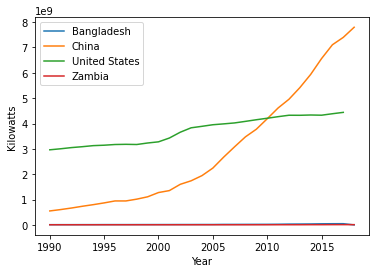

In [17]:
fig, ax = plt.subplots()

energy_gdp_select.groupby('Country').plot(
    ax = ax,
    x = 'Year',
    y = 'Kw',
    kind = 'line')

plt.legend(labels = ['Bangladesh', 'China', 'United States', 'Zambia'])
plt.ylabel('Kilowatts')

Text(0, 0.5, 'Kilowatts')

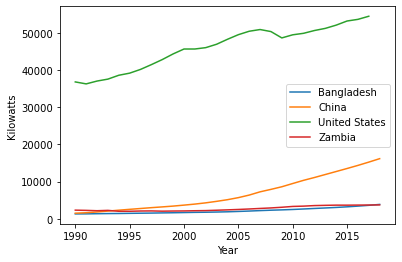

In [28]:
fig, ax = plt.subplots()

energy_gdp_select.groupby('Country').plot(
    ax = ax,
    x = 'Year',
    y = 'GDP_Per_Capita',
    kind = 'line')

plt.legend(labels = ['Bangladesh', 'China', 'United States', 'Zambia'])
plt.ylabel('Kilowatts')

NameError: name 'z' is not defined

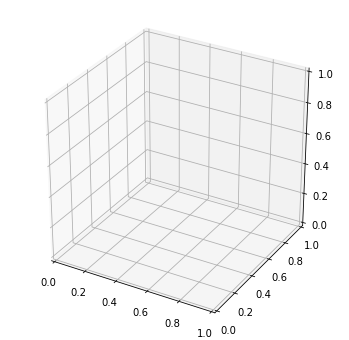

In [27]:
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, projection='3d')

energy_gdp_select.groupby('Country').plot(
    x = 'Year',
    y = 'GDP_Per_Capita',
    z = 'Kw',
    kind = 'scatter',
    alpha=.7,
    edgecolor='k',
    s = 200,
    c=z)